In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix
)

In [39]:
random_state = 42

## Uso Simples

In [3]:
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)   

0.913

# Database

In [8]:
# X = [[0, 0], [1, 1]]
# Y = [0, 1]
X, y = make_hastie_10_2()

In [7]:
database_name = 'student-mat.csv'
coluna_target = 'school'
if database_name:
    base = pd.read_csv(database_name, sep=';')
    X = base.drop(columns=coluna_target)
    y = base[[coluna_target]]

# Dataprep

In [9]:
X_og = X.copy()

# Mantendo apenas Variáveis Independentes Desejadas

In [10]:
accepted_features = [
    # 'age',
    # 'Medu',
    # 'Fedu'
]

if accepted_features:
    X = X[accepted_features]

# Tratando Variáveis Categóricas

In [12]:
try:
    num_features = X_og.describe().columns.tolist()
except:
    pass

In [13]:
try:
    cat_features = X_og.drop(columns=num_features).columns.tolist()
except:
    pass

In [14]:
try:
    # One-hot encoding
    X = pd.get_dummies(X,
                       columns=cat_features,
                       drop_first=True)
except:
    pass

# Tratando Missings e Outliers

In [15]:
#

## Dividir Base de Treino

In [16]:
train_size = 0.8

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    train_size=train_size,
                                                                    random_state=random_state)

# Inicializar Classificador

In [18]:
clf_dict = {
    'max_depth': 7, # Profundidade Máxima da Árvore
    #'min_samples_split': 2,  # Mínimo para haver split de nó
    #'min_samples_leaf': 1,  # Mínimo para ser nó de decisão
    'random_state': random_state,
}

In [19]:
clf = GradientBoostingClassifier(**clf_dict)

# Train

In [21]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, random_state=42)

# Predict

In [22]:
# y_pred = clf.predict([[2., 2.]])
y_pred = clf.predict(X_test)

In [23]:
# y_pred_probs  = clf.predict_proba([[2., 2.]])
y_pred_probs  = clf.predict_proba(X_test)

# Teste

In [24]:
classes = None # ['class 0', 'class 1']

In [25]:
accuracy = accuracy_score(y_test, y_pred)

In [26]:
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 0.92


In [27]:
results = classification_report(y_test,
                                y_pred,
                                target_names=classes)

In [28]:
print(results)

              precision    recall  f1-score   support

        -1.0       0.91      0.92      0.92      1214
         1.0       0.92      0.91      0.91      1186

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



# Teste de Validação Cruzada

In [29]:
metricas = {'acc': 'accuracy',
            'recall': 'recall_macro',
            'f1': 'f1_macro',
           }

In [30]:
# Validação de Cruzada de 5 dobras
k = 5  # Número de dobras
cv_scores = model_selection.cross_validate(clf,
                                            X,
                                            y,
                                            scoring=metricas,
                                            cv=k)

In [31]:
cv_scores

{'fit_time': array([9.27271676, 9.13639164, 9.20628691, 8.88342905, 9.02967525]),
 'score_time': array([0.01160669, 0.01441741, 0.01254106, 0.01156592, 0.01129389]),
 'test_acc': array([0.91375   , 0.91875   , 0.91958333, 0.90666667, 0.91875   ]),
 'test_recall': array([0.91384672, 0.918808  , 0.91962678, 0.90670724, 0.91876672]),
 'test_f1': array([0.91373908, 0.91874829, 0.91958298, 0.90666641, 0.91874987])}

In [32]:
mean_test_acc = np.mean(cv_scores['test_acc'])
std_test_acc = np.std(cv_scores['test_acc'])

In [33]:
print(f"Média de cross-validation para acc: {mean_test_acc:.2f}")
print(f"Desvio-padrão de cross-validation para acc: {std_test_acc:.2f}")

Média de cross-validation para acc: 0.92
Desvio-padrão de cross-validation para acc: 0.00


# Matriz de Confusão

In [34]:
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.title('Matriz de Confusão')
    plt.xlabel('Rótulos Previstos')
    plt.ylabel('Rótulos Verdadeiros')
    plt.show()

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)

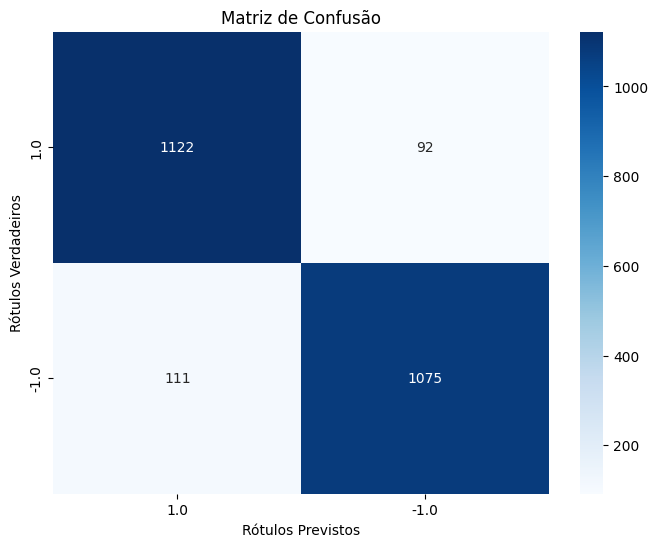

In [37]:
plot_confusion_matrix(conf_matrix, classes=set(y))
